In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


## EDA

In [2]:
data= pd.read_csv("news.csv")


In [3]:
data.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [5]:
data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [7]:
data.shape

(6335, 4)

In [8]:
data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [9]:
labels= data.label


In [10]:
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

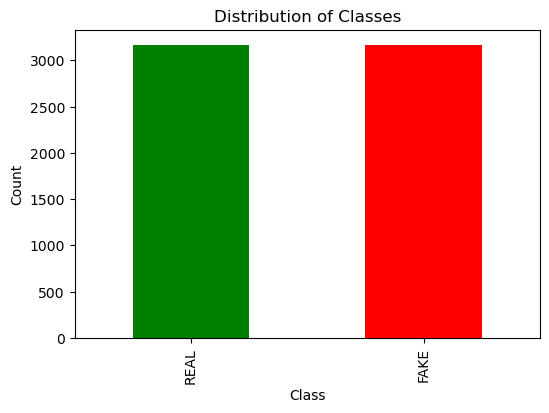

In [11]:

# Exploring the distribution of classes
plt.figure(figsize=(6, 4))
data["label"].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



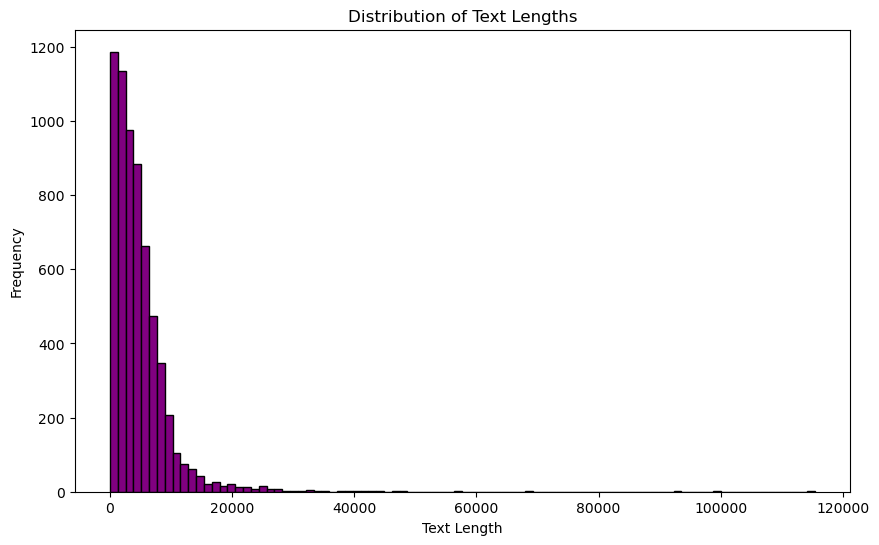

In [12]:
# Exploring the distribution of text lengths
data['text_length'] = data['text'].apply(len)
plt.figure(figsize=(10, 6))
data['text_length'].plot(kind='hist', bins=90, color='purple', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()



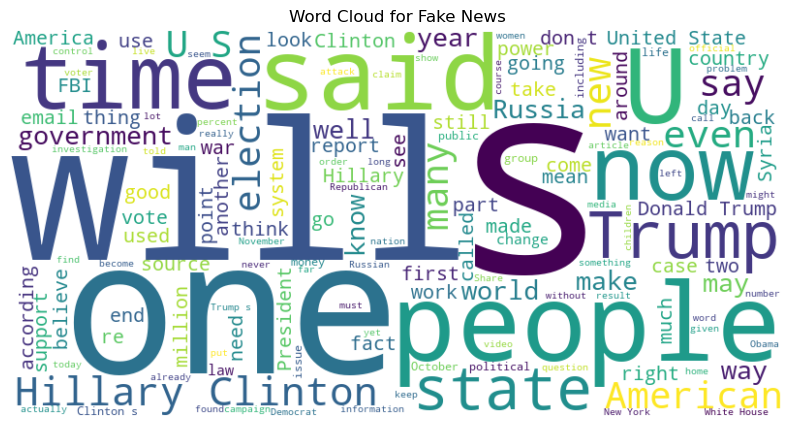

In [13]:
# Creating a Word Cloud for fake news
fake_text = ' '.join(data[data['label'] == 'FAKE']['text'])
wordcloud_fake = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()



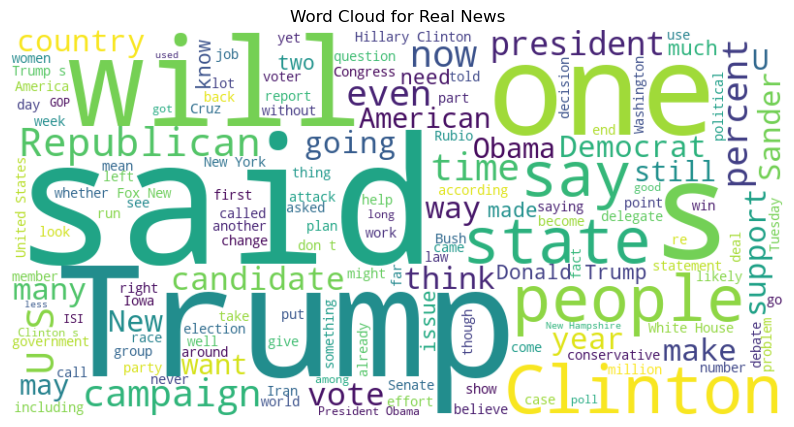

In [14]:
# Creating a Word Cloud for real news
real_text = ' '.join(data[data['label'] == 'REAL']['text'])
wordcloud_real = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(real_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()


## Model Building

In [15]:

x_train, x_test, y_train, y_test= train_test_split(data["text"], labels, test_size= 0.4, random_state= 7)

In [16]:

vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train) 
tfidf_test=vectorizer.transform(x_test)

In [17]:

passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)

## Evaluate the model's accuracy

In [18]:
#Confusion Matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[1184,   86],
       [  84, 1180]], dtype=int64)

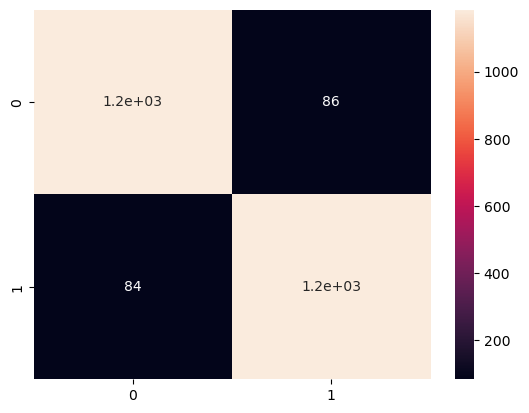

In [19]:

sns.heatmap(matrix, annot=True)
plt.show()

In [20]:
#model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

93.29123914759275

#### The model's accuracy is 93%

In [21]:
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93      1270
        REAL       0.93      0.93      0.93      1264

    accuracy                           0.93      2534
   macro avg       0.93      0.93      0.93      2534
weighted avg       0.93      0.93      0.93      2534



In [22]:
#Feature Importance

In [23]:
# Getting feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Geting coefficients from the trained PassiveAggressiveClassifier
coefficients = passive.coef_[0]


feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of coefficients to identify important features
feature_importance_df['Absolute_Coefficient'] = feature_importance_df['Coefficient'].abs()
sorted_feature_importance = feature_importance_df.sort_values(by='Absolute_Coefficient', ascending=False)


top_n = 20
print(f"Top {top_n} Important Features:")
print(sorted_feature_importance.head(top_n))
'''positive coefficients indicate features associated with the
FAKE class, while negative coefficients are associated with the REAL class. 
The larger the absolute value of the coefficient, the more influential 
the feature is in the model's decision-making process.'''

Top 20 Important Features:
             Feature  Coefficient  Absolute_Coefficient
605             2016    -5.120020              5.120020
41852           said     4.591362              4.591362
33842        october    -4.444728              4.444728
42237           says     3.159206              3.159206
33453       november    -2.893663              2.893663
22818        hillary    -2.769522              2.769522
4186         article    -2.702967              2.702967
43342          share    -2.573941              2.573941
31844          mosul    -2.549692              2.549692
16120       election    -2.454287              2.454287
44584           snip    -2.401864              2.401864
8285      candidates     2.351602              2.351602
29914       marriage     2.350179              2.350179
49464        tuesday     2.321437              2.321437
41645           rush     2.316225              2.316225
42019        sanders     2.265185              2.265185
11044   conservative 

"positive coefficients indicate features associated with the\nFAKE class, while negative coefficients are associated with the REAL class. \nThe larger the absolute value of the coefficient, the more influential \nthe feature is in the model's decision-making process."

## Testing

In [24]:
input_title ='Kerry to go to Paris in gesture of sympathy,"U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sunday’s unity march against terrorism.'
input_text = '''Kerry said he expects to arrive in Paris Thursday evening, as he heads home after a week abroad. He said he will fly to France at the conclusion of a series of meetings scheduled for Thursday in Sofia, Bulgaria. He plans to meet the next day with Foreign Minister Laurent Fabius and President Francois Hollande, then return to Washington.

The visit by Kerry, who has family and childhood ties to the country and speaks fluent French, could address some of the criticism that the United States snubbed France in its darkest hour in many years.

The French press on Monday was filled with questions about why neither President Obama nor Kerry attended Sunday’s march, as about 40 leaders of other nations did. Obama was said to have stayed away because his own security needs can be taxing on a country, and Kerry had prior commitments.

Among roughly 40 leaders who did attend was Israeli Prime Minister Benjamin Netanyahu, no stranger to intense security, who marched beside Hollande through the city streets. The highest ranking U.S. officials attending the march were Jane Hartley, the ambassador to France, and Victoria Nuland, the assistant secretary of state for European affairs. Attorney General Eric H. Holder Jr. was in Paris for meetings with law enforcement officials but did not participate in the march.

Kerry spent Sunday at a business summit hosted by India’s prime minister, Narendra Modi. The United States is eager for India to relax stringent laws that function as barriers to foreign investment and hopes Modi’s government will act to open the huge Indian market for more American businesses.

In a news conference, Kerry brushed aside criticism that the United States had not sent a more senior official to Paris as “quibbling a little bit.” He noted that many staffers of the American Embassy in Paris attended the march, including the ambassador. He said he had wanted to be present at the march himself but could not because of his prior commitments in India.

“But that is why I am going there on the way home, to make it crystal clear how passionately we feel about the events that have taken place there,” he said.

“And I don’t think the people of France have any doubts about America’s understanding of what happened, of our personal sense of loss and our deep commitment to the people of France in this moment of trauma.”'''

# Concatenate title and text
input_combined = f"{input_title} {input_text}"

# Transform the combined input using the same TF-IDF vectorizer
tfidf_input = vectorizer.transform([input_combined])

# Make prediction using the trained PassiveAggressiveClassifier
prediction = passive.predict(tfidf_input)

# Display the prediction
print(f"The input news is predicted as: {prediction[0]}")


The input news is predicted as: REAL


In [25]:
import joblib

# Save the trained PassiveAggressiveClassifier model
joblib.dump(passive, 'fake_news_model.pkl')

# Save the TF-IDF vectorizer as well (if you haven't already)
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']